In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import skimage.io
import numpy as np
from tqdm import tqdm
import cv2
from glob import glob
import warnings
import random

label_map = {'normal':1,
             'fibrosis':2,
             'tumor':3,
            }
def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
        
        
        
def read_nuclei(path):
    "Read raw data"

    # Load 4-channel image
    if len(path) == 0:
        return None
    
    img = skimage.io.imread(path)
    
    # input image
    if len(img.shape) > 2:
        img = img[:,:,:3]
    # mask
    else:
        # do nothing
        pass
        
    return img



def save_nuclei(path, img):
    "save image"
    skimage.io.imsave(path, img)
ROOT_DIR = os.path.abspath(".")
print(ROOT_DIR)
VOC_DIR = os.path.join(ROOT_DIR, "HE_images_liver", "data_dataset_voc/")
NPY_FOLDER = os.path.join(VOC_DIR, "SegmentationClass/")
IMG_FOLDER = os.path.join(VOC_DIR, "JPEGImages/")
MASKS_DEST = os.path.join(VOC_DIR, "SegmentationMasks/")
IMAGES_DEST = os.path.join(VOC_DIR, "SegmentationImages/")

/Users/johnshieh/Lab2020/MoNuSAC-ISBI-2020


/Users/johnshieh/opt/miniconda3/envs/monuv1/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: /Users/johnshieh/Lab2020/MoNuSAC-ISBI-2020/HE_images_liver/data_dataset_voc/SegmentationMasks/case1-40-1.png is a low contrast image
/Users/johnshieh/opt/miniconda3/envs/monuv1/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: /Users/johnshieh/Lab2020/MoNuSAC-ISBI-2020/HE_images_liver/data_dataset_voc/SegmentationMasks/case4-1-40.png is a low contrast image
/Users/johnshieh/opt/miniconda3/envs/monuv1/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: /Users/johnshieh/Lab2020/MoNuSAC-ISBI-2020/HE_images_liver/data_dataset_voc/SegmentationMasks/case5-1-40-1.png is a low contrast image
/Users/johnshieh/opt/miniconda3/envs/monuv1/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: /Users/johnshieh/Lab2020/MoNuSAC-ISBI-2020/HE_images_liver/data_dataset_voc/SegmentationMasks/case5_2_2_40.png is a low contrast image


uint8
Ground truth classes:  [0 1]
(1985, 3636, 3)


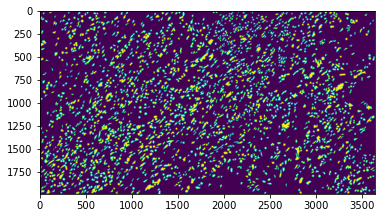

In [2]:
mask_paths = sorted(glob(NPY_FOLDER + "/*"))
img_paths = sorted(glob(IMG_FOLDER + "/*"))
imgs = []
masks = []
# for img in img_paths:
#     save_nuclei(IMAGES_DEST+ "{}.png".format(os.path.basename(img)), img)
for mask in mask_paths:
    loaded = np.load(mask)
    loaded = loaded.astype(np.uint8)
    masks.append(loaded)
    save_nuclei(MASKS_DEST + "{}.png".format(os.path.basename(mask)[:-4]), loaded)
    
val0 = masks[0].flatten()
plt.imshow(masks[2])
print(masks[0].dtype)
print("Ground truth classes: ", np.unique(val0))
img = skimage.io.imread(img_paths[0])
print(img.shape)

Index: 1
case4-1-40.png
case4-1-40.png
(1985, 3636, 3) (1985, 3636)
Ground truth classes:  [0 3]


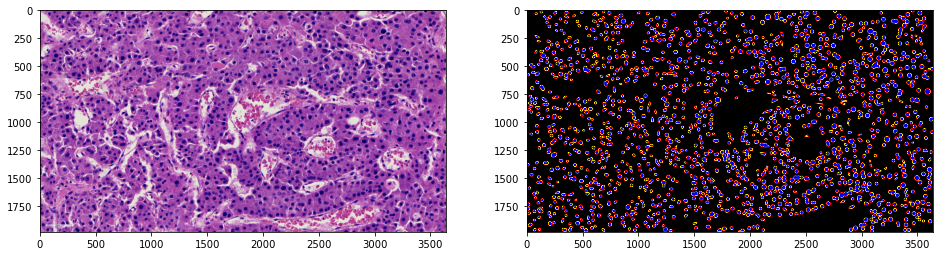

In [8]:
image_fns = sorted(next(os.walk(IMAGES_DEST))[2])
gt_fns = sorted(next(os.walk(MASKS_DEST))[2])
idx = random.randrange(len(image_fns))
idx = 1
print("Index:", idx)
print(image_fns[idx])
print(gt_fns[idx])
# Read image and mask
image = skimage.io.imread(os.path.join(IMAGES_DEST, image_fns[idx]))
gt = skimage.io.imread(os.path.join(MASKS_DEST, gt_fns[idx]))

#testing
assert image.shape[:2] == gt.shape, "Wrong image or ground truth!"
assert image.dtype == gt.dtype, "Wrong data types!"
print(image.shape, gt.shape)

val1 = gt.flatten()
print("Ground truth classes: ", np.unique(val1))

f, axarr = plt.subplots(1,2, figsize=(16,16))

norm=plt.Normalize(0,3) # 5 classes including BG
map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue"])

axarr[0].imshow(image, cmap=map_name, norm=norm)
axarr[1].imshow(gt, cmap=map_name, norm=norm)